In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [3]:
df=pd.read_csv('gas_turbines.csv')

In [4]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [7]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

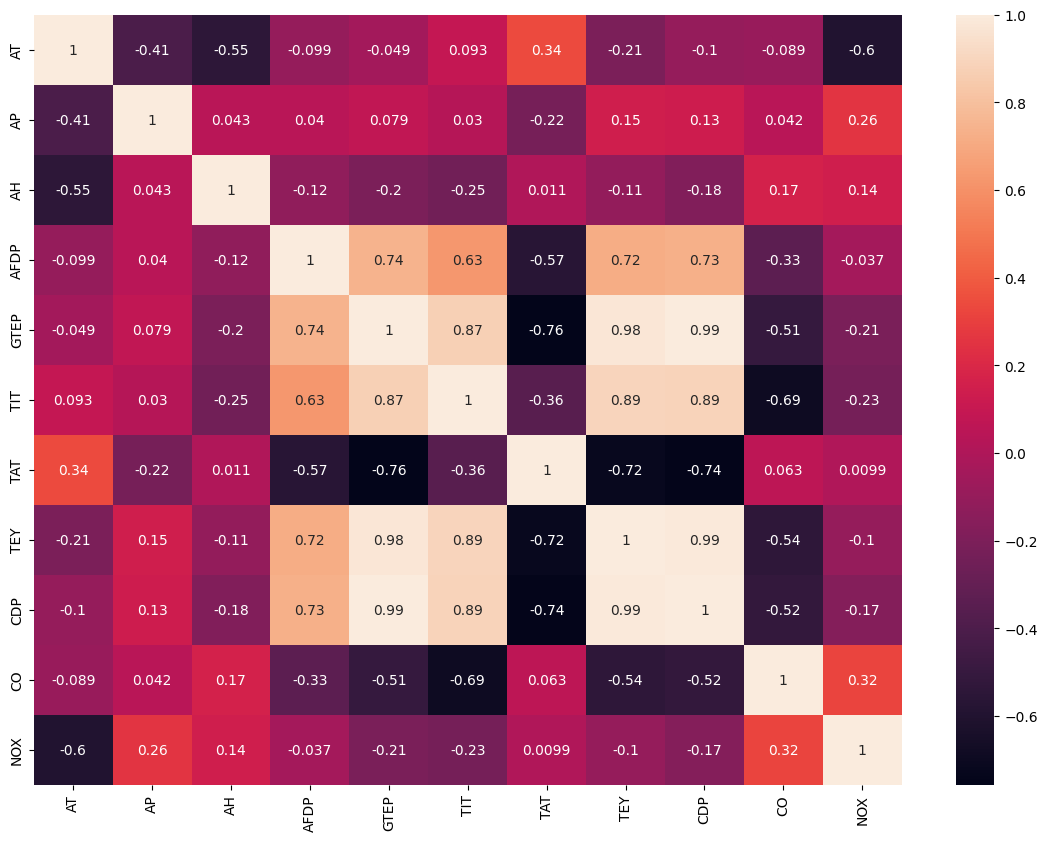

In [9]:
fig= plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=90);

In [10]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

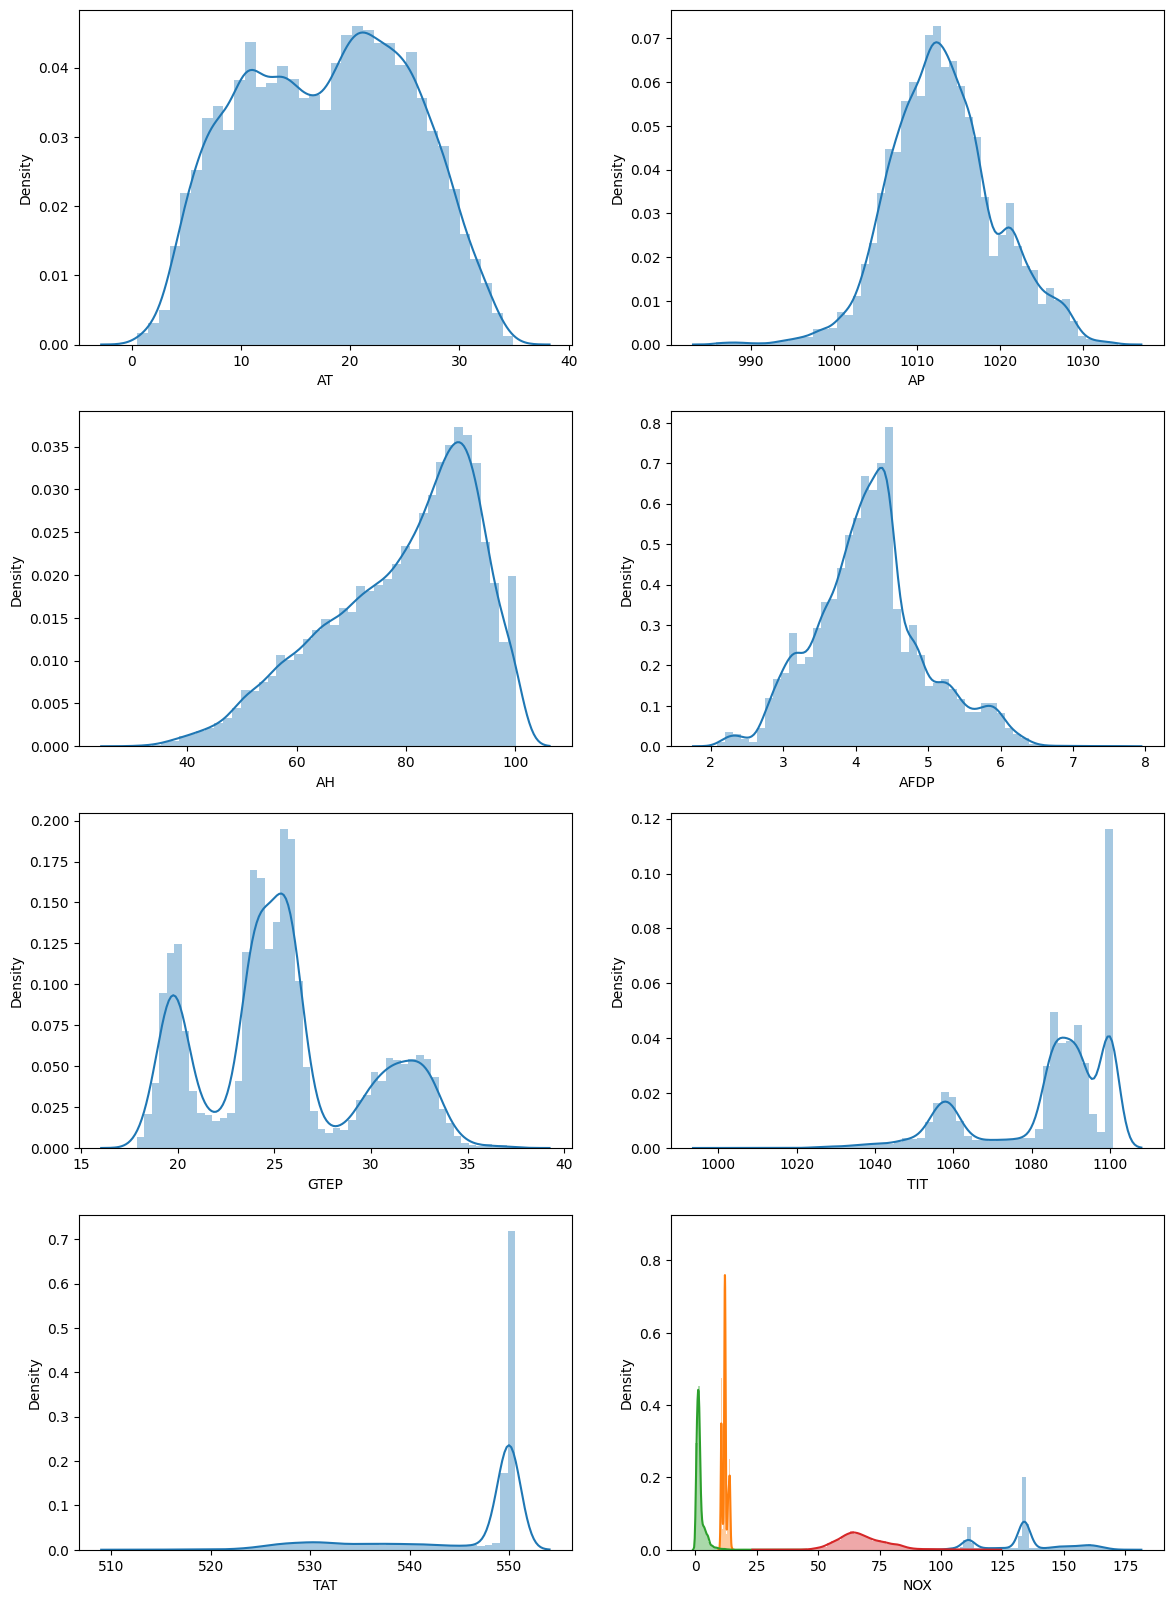

In [11]:
fig, ax = plt.subplots(4,2, figsize = (14,20))
sns.distplot(df.AT, ax = ax[0,0])
sns.distplot(df.AP, ax = ax[0,1])
sns.distplot(df.AH, ax = ax[1,0])
sns.distplot(df.AFDP, ax = ax[1,1])
sns.distplot(df.GTEP, ax = ax[2,0])
sns.distplot(df.TIT, ax = ax[2,1])
sns.distplot(df.TAT, ax = ax[3,0])
sns.distplot(df.TEY, ax = ax[3,1])
sns.distplot(df.CDP, ax = ax[3,1])
sns.distplot(df.CO, ax = ax[3,1])
sns.distplot(df.NOX, ax = ax[3,1])

plt.show()

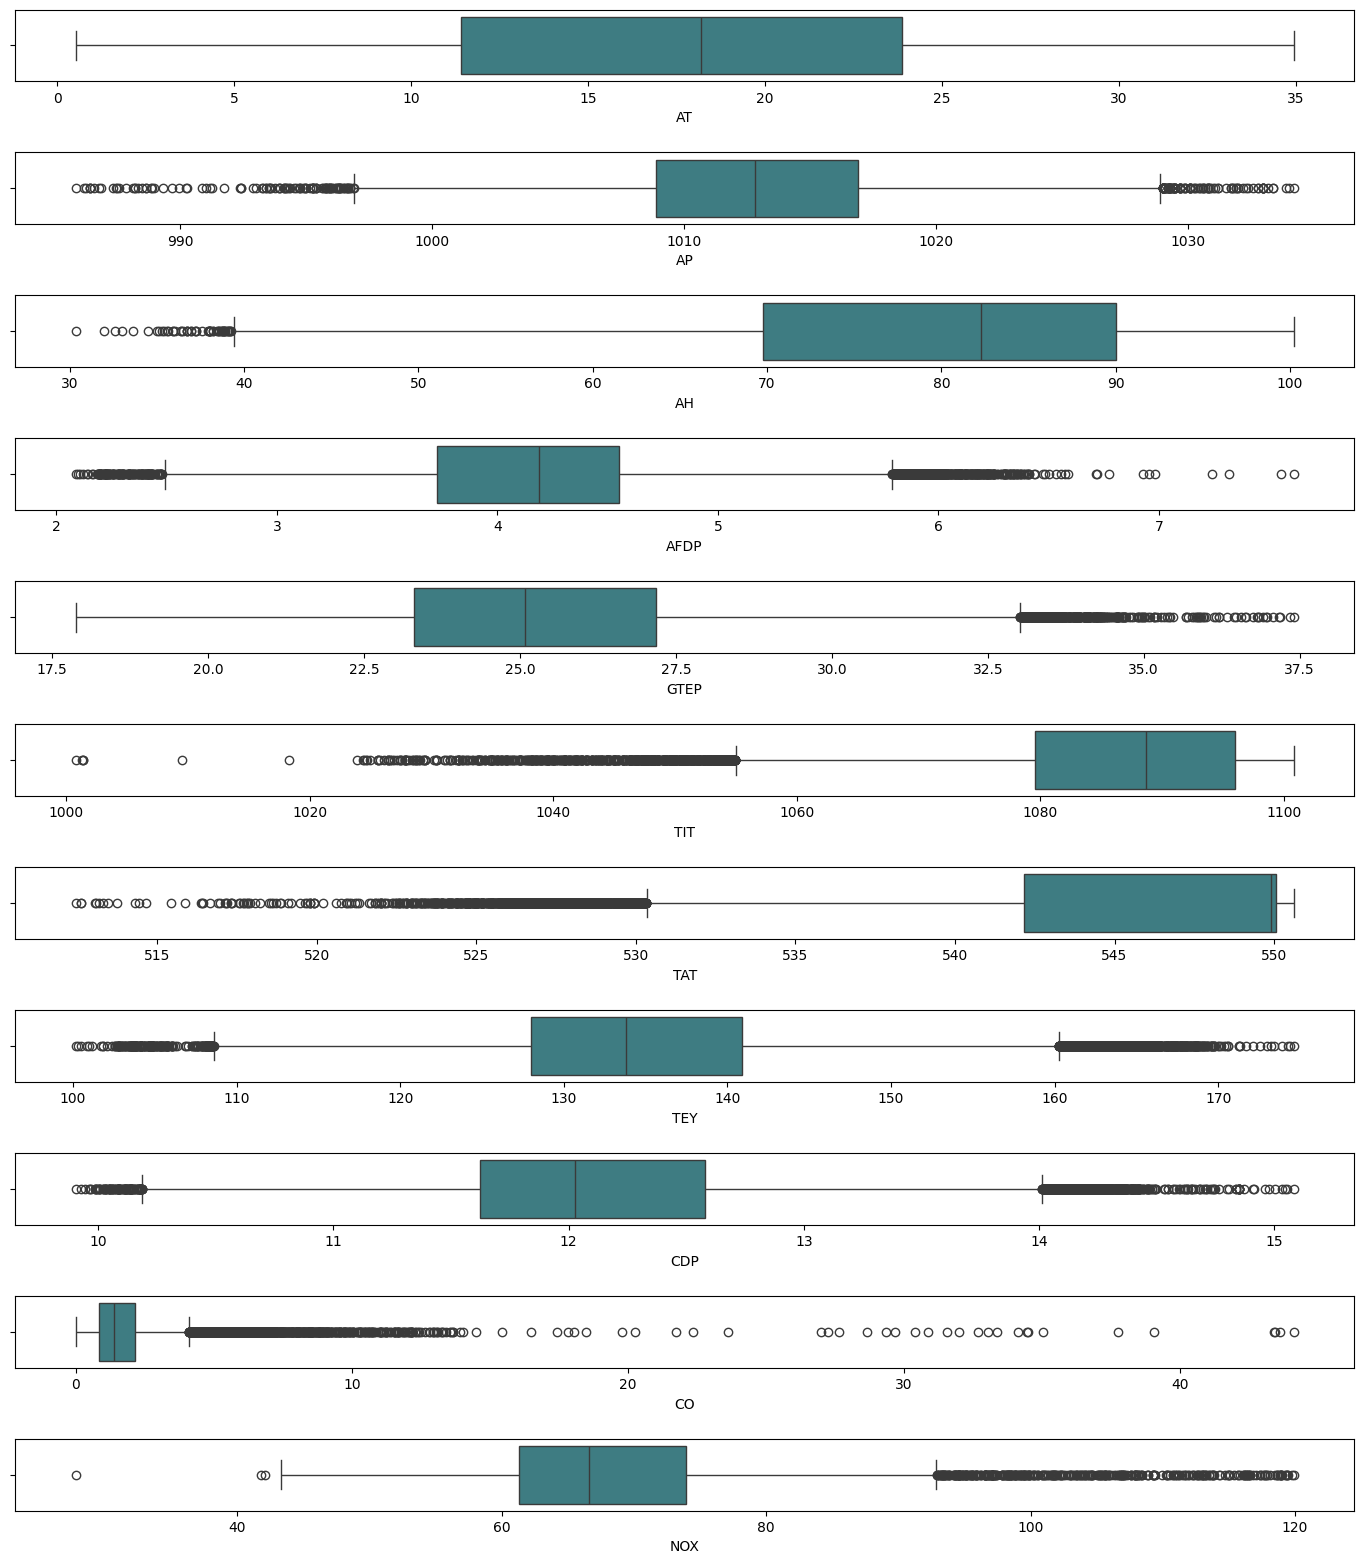

In [12]:
ot=df.copy()
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

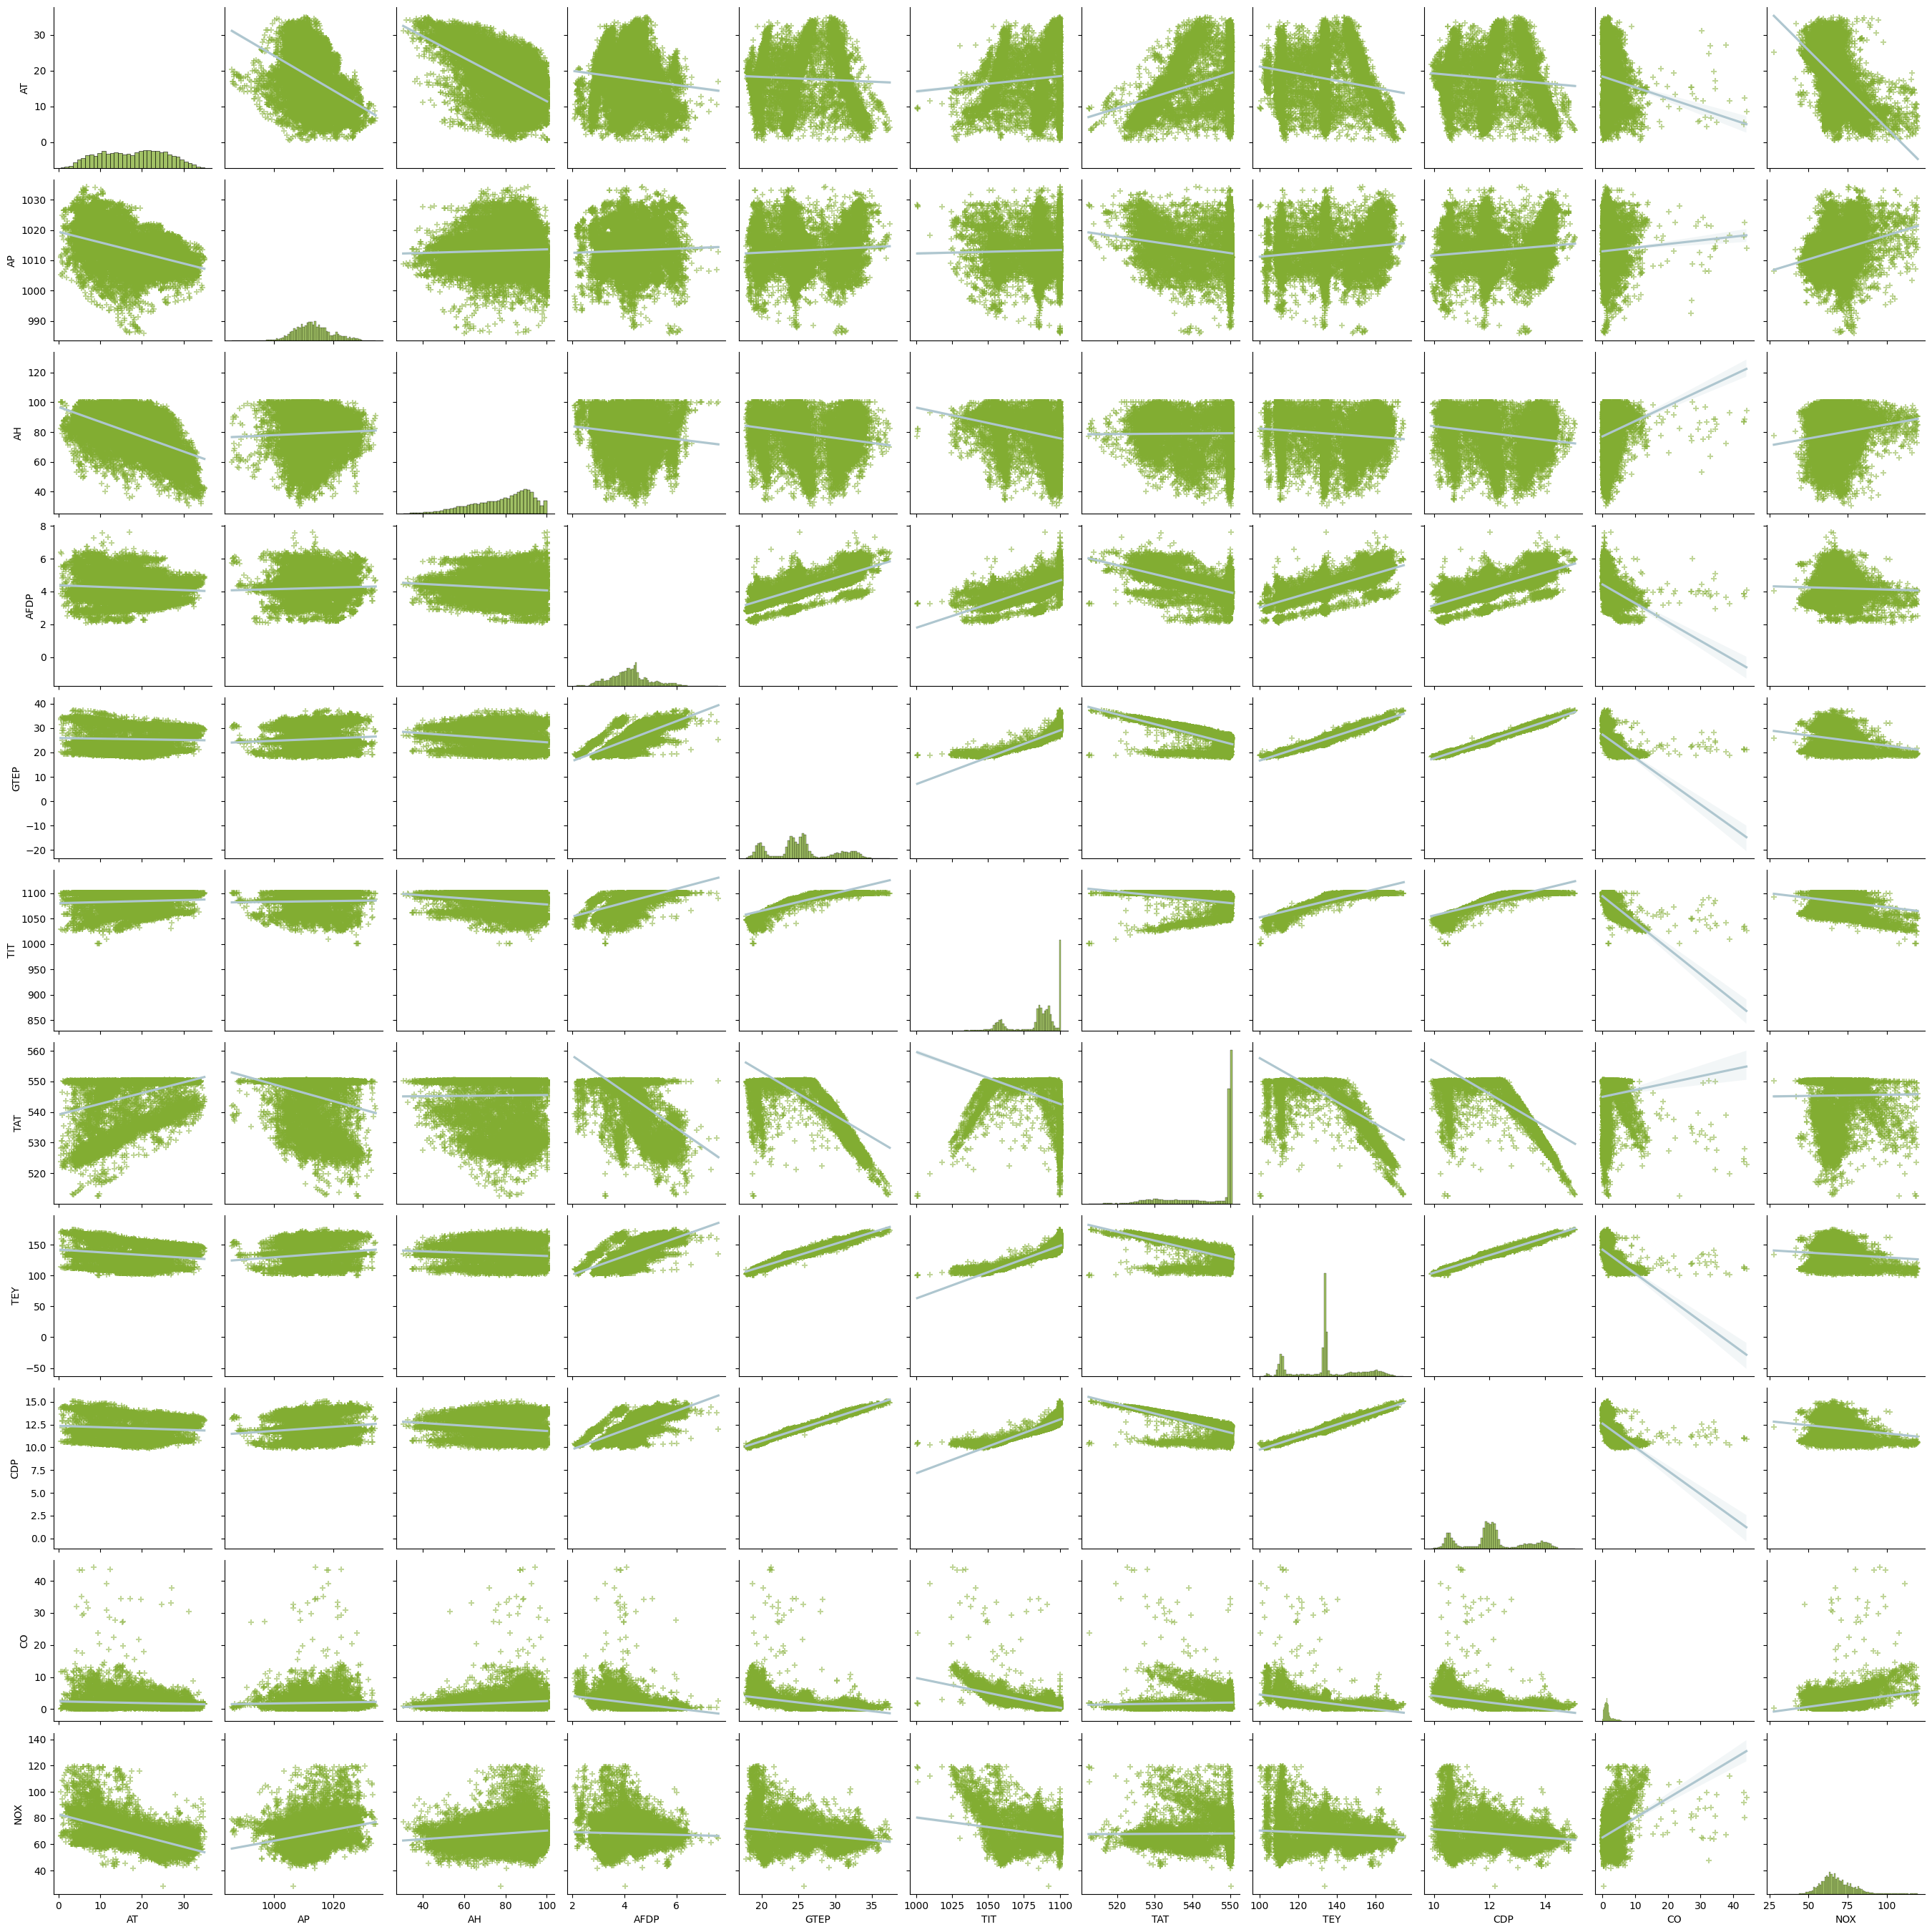

In [13]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},

                 diag_kws= {'color': '#82ad32'})

In [14]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [15]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

In [16]:
x.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], dtype='object')

In [17]:
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 11


In [18]:
df_standard_scaled = df.copy()
features = df_standard_scaled[continuous_feature]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591


In [21]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 AT      0.0
AP     -0.0
AH      0.0
AFDP    0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
TEY     0.0
CDP     0.0
CO      0.0
NOX     0.0
dtype: float64 
Standard Devaition 
 AT      1.0
AP      1.0
AH      1.0
AFDP    1.0
GTEP    1.0
TIT     1.0
TAT     1.0
TEY     1.0
CDP     1.0
CO      1.0
NOX     1.0
dtype: float64 1


In [20]:
df.shape

(15039, 11)

In [22]:
x.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], dtype='object')

In [23]:
x.columns.shape

(10,)

In [24]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [25]:
pip install scikeras

In [26]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

In [27]:
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(40, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [28]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [29]:
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=10, epochs=10....................................
[CV 1/5; 1/6] END ...batch_size=10, epochs=10;, score=-54.435 total time=  22.9s
[CV 2/5; 1/6] START batch_size=10, epochs=10....................................
[CV 2/5; 1/6] END ..batch_size=10, epochs=10;, score=-164.062 total time=  21.6s
[CV 3/5; 1/6] START batch_size=10, epochs=10....................................
[CV 3/5; 1/6] END ...batch_size=10, epochs=10;, score=-66.296 total time=  12.6s
[CV 4/5; 1/6] START batch_size=10, epochs=10....................................
[CV 4/5; 1/6] END ...batch_size=10, epochs=10;, score=-76.561 total time=  14.0s
[CV 5/5; 1/6] START batch_size=10, epochs=10....................................
[CV 5/5; 1/6] END ...batch_size=10, epochs=10;, score=-68.522 total time=  21.4s
[CV 1/5; 2/6] START batch_size=10, epochs=50....................................
[CV 1/5; 2/6] END ...batch_size=10, epochs=50;, s

In [30]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -85.97527050092489, using {'batch_size': 10, 'epochs': 10}
-85.97527050092489,39.68087037979014 with: {'batch_size': 10, 'epochs': 10}
-85.97527050092489,39.68087037979014 with: {'batch_size': 10, 'epochs': 50}
-85.97527050092489,39.68087037979014 with: {'batch_size': 20, 'epochs': 10}
-85.97527050092489,39.68087037979014 with: {'batch_size': 20, 'epochs': 50}
-85.98435178942705,39.676370425284446 with: {'batch_size': 40, 'epochs': 10}
-85.97527050092489,39.68087037979014 with: {'batch_size': 40, 'epochs': 50}


In [48]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(20,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(30,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [50]:
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']


In [51]:
model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10, activation_function= activation_function, init = init)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=-54.435 total time=   6.8s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=-164.062 total time=  11.1s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=-66.296 total time=  11.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=-76.561 total time=  11.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=-68.522 total time=   7.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=-54.435 total time=   8.2s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=-164.062 total time=   7.0s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=-66.296 total time=  11.3s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=-76.561 total time=   7.4s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=-68.522 total time=  11.3s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=-54.435 total time=   7.0s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=-164.062 total time=   7.1s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=-66.296 total time=   7.2s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=-76.561 total time=   7.0s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=-68.522 total time=  12.3s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=-54.435 total time=   7.4s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=-164.062 total time=   7.7s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=-66.296 total time=   6.8s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=-76.561 total time=   7.2s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=-68.522 total time=   7.3s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=-54.435 total time=  11.1s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=-164.062 total time=   6.8s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=-66.296 total time=   7.3s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=-76.561 total time=  11.2s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=-68.522 total time=   7.5s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=-54.437 total time=   6.8s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=-164.068 total time=   7.3s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=-66.298 total time=   6.7s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=-76.564 total time=  11.3s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=-68.525 total time=   7.3s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=-54.435 total time=  11.1s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=-164.062 total time=   7.2s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=-66.296 total time=  11.1s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=-76.561 total time=  11.1s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=-68.522 total time=  11.2s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=-54.435 total time=   6.9s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=-164.062 total time=  11.1s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=-66.296 total time=   7.1s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=-76.561 total time=  11.1s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=-68.522 total time=   7.2s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=-54.435 total time=  11.3s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=-164.062 total time=   6.8s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=-66.296 total time=  11.1s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=-76.561 total time=   7.3s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=-68.522 total time=   6.8s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=-54.435 total time=   7.2s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=-164.062 total time=  11.3s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=-66.296 total time=   7.1s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=-76.561 total time=   6.7s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=-68.522 total time=   8.5s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=-54.435 total time=  11.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=-164.062 total time=   7.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=-66.296 total time=  11.1s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=-76.561 total time=  11.3s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=-68.522 total time=   7.6s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=-54.435 total time=   7.9s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=-164.062 total time=  11.1s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=-66.296 total time=  11.1s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=-76.561 total time=  11.1s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=-68.522 total time=   7.3s


In [52]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -85.97527050092489, using {'activation_function': 'relu', 'init': 'uniform'}
-85.97527150746588,39.680870803057424 with: {'activation_function': 'softmax', 'init': 'uniform'}
-85.97527147195416,39.680870883473965 with: {'activation_function': 'softmax', 'init': 'normal'}
-85.97527158598136,39.68087098771848 with: {'activation_function': 'softmax', 'init': 'zero'}
-85.97527050092489,39.68087037979014 with: {'activation_function': 'relu', 'init': 'uniform'}
-85.97527050092489,39.68087037979014 with: {'activation_function': 'relu', 'init': 'normal'}
-85.97843877021114,39.6824076232655 with: {'activation_function': 'relu', 'init': 'zero'}
-85.97527050092489,39.68087037979014 with: {'activation_function': 'tanh', 'init': 'uniform'}
-85.97527050092489,39.68087037979014 with: {'activation_function': 'tanh', 'init': 'normal'}
-85.97527050092489,39.68087037979014 with: {'activation_function': 'tanh', 'init': 'zero'}
-85.97527050092489,39.68087037979014 with: {'activation_function': 'line

In [65]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [66]:
neuron1 = [5,10]
neuron2 = [5,10,15]

In [67]:
model= KerasRegressor(build_fn=create_model,verbose=0,batch_size=10,epochs=10,neuron1= neuron1, neuron2=neuron2)

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)


In [68]:
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START neuron1=5, neuron2=5........................................


[CV 1/5; 1/6] END .......neuron1=5, neuron2=5;, score=-54.435 total time=  21.9s
[CV 2/5; 1/6] START neuron1=5, neuron2=5........................................


[CV 2/5; 1/6] END ......neuron1=5, neuron2=5;, score=-164.062 total time=  21.5s
[CV 3/5; 1/6] START neuron1=5, neuron2=5........................................


[CV 3/5; 1/6] END .......neuron1=5, neuron2=5;, score=-66.296 total time=  14.3s
[CV 4/5; 1/6] START neuron1=5, neuron2=5........................................


[CV 4/5; 1/6] END .......neuron1=5, neuron2=5;, score=-76.561 total time=  21.5s
[CV 5/5; 1/6] START neuron1=5, neuron2=5........................................


[CV 5/5; 1/6] END .......neuron1=5, neuron2=5;, score=-68.522 total time=  13.1s
[CV 1/5; 2/6] START neuron1=5, neuron2=10.......................................


[CV 1/5; 2/6] END ......neuron1=5, neuron2=10;, score=-54.435 total time=  21.5s
[CV 2/5; 2/6] START neuron1=5, neuron2=10.......................................


[CV 2/5; 2/6] END .....neuron1=5, neuron2=10;, score=-164.062 total time=  21.5s
[CV 3/5; 2/6] START neuron1=5, neuron2=10.......................................


[CV 3/5; 2/6] END ......neuron1=5, neuron2=10;, score=-66.296 total time=  13.0s
[CV 4/5; 2/6] START neuron1=5, neuron2=10.......................................


[CV 4/5; 2/6] END ......neuron1=5, neuron2=10;, score=-76.561 total time=  21.5s
[CV 5/5; 2/6] START neuron1=5, neuron2=10.......................................


[CV 5/5; 2/6] END ......neuron1=5, neuron2=10;, score=-68.522 total time=  21.5s
[CV 1/5; 3/6] START neuron1=5, neuron2=15.......................................


[CV 1/5; 3/6] END ......neuron1=5, neuron2=15;, score=-54.435 total time=  12.9s
[CV 2/5; 3/6] START neuron1=5, neuron2=15.......................................


[CV 2/5; 3/6] END .....neuron1=5, neuron2=15;, score=-164.062 total time=  13.0s
[CV 3/5; 3/6] START neuron1=5, neuron2=15.......................................


[CV 3/5; 3/6] END ......neuron1=5, neuron2=15;, score=-66.296 total time=  13.0s
[CV 4/5; 3/6] START neuron1=5, neuron2=15.......................................


[CV 4/5; 3/6] END ......neuron1=5, neuron2=15;, score=-76.561 total time=  21.5s
[CV 5/5; 3/6] START neuron1=5, neuron2=15.......................................


[CV 5/5; 3/6] END ......neuron1=5, neuron2=15;, score=-68.522 total time=  13.0s
[CV 1/5; 4/6] START neuron1=10, neuron2=5.......................................


[CV 1/5; 4/6] END ......neuron1=10, neuron2=5;, score=-54.435 total time=  21.5s
[CV 2/5; 4/6] START neuron1=10, neuron2=5.......................................


[CV 2/5; 4/6] END .....neuron1=10, neuron2=5;, score=-164.062 total time=  21.5s
[CV 3/5; 4/6] START neuron1=10, neuron2=5.......................................


[CV 3/5; 4/6] END ......neuron1=10, neuron2=5;, score=-66.296 total time=  12.9s
[CV 4/5; 4/6] START neuron1=10, neuron2=5.......................................


[CV 4/5; 4/6] END ......neuron1=10, neuron2=5;, score=-76.561 total time=  12.8s
[CV 5/5; 4/6] START neuron1=10, neuron2=5.......................................


[CV 5/5; 4/6] END ......neuron1=10, neuron2=5;, score=-68.522 total time=  15.1s
[CV 1/5; 5/6] START neuron1=10, neuron2=10......................................


[CV 1/5; 5/6] END .....neuron1=10, neuron2=10;, score=-54.435 total time=  21.6s
[CV 2/5; 5/6] START neuron1=10, neuron2=10......................................


[CV 2/5; 5/6] END ....neuron1=10, neuron2=10;, score=-164.062 total time=  21.6s
[CV 3/5; 5/6] START neuron1=10, neuron2=10......................................


[CV 3/5; 5/6] END .....neuron1=10, neuron2=10;, score=-66.296 total time=  21.7s
[CV 4/5; 5/6] START neuron1=10, neuron2=10......................................


[CV 4/5; 5/6] END .....neuron1=10, neuron2=10;, score=-76.561 total time=  21.7s
[CV 5/5; 5/6] START neuron1=10, neuron2=10......................................


[CV 5/5; 5/6] END .....neuron1=10, neuron2=10;, score=-68.522 total time=  13.5s
[CV 1/5; 6/6] START neuron1=10, neuron2=15......................................


[CV 1/5; 6/6] END .....neuron1=10, neuron2=15;, score=-54.435 total time=  21.6s
[CV 2/5; 6/6] START neuron1=10, neuron2=15......................................


[CV 2/5; 6/6] END ....neuron1=10, neuron2=15;, score=-164.062 total time=  21.7s
[CV 3/5; 6/6] START neuron1=10, neuron2=15......................................


[CV 3/5; 6/6] END .....neuron1=10, neuron2=15;, score=-66.296 total time=  21.5s
[CV 4/5; 6/6] START neuron1=10, neuron2=15......................................


[CV 4/5; 6/6] END .....neuron1=10, neuron2=15;, score=-76.561 total time=  21.5s
[CV 5/5; 6/6] START neuron1=10, neuron2=15......................................


[CV 5/5; 6/6] END .....neuron1=10, neuron2=15;, score=-68.522 total time=  13.1s


In [69]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -85.97527050092489, using {'neuron1': 5, 'neuron2': 5}
-85.97527050092489,39.68087037979014 with: {'neuron1': 5, 'neuron2': 5}
-85.97527050092489,39.68087037979014 with: {'neuron1': 5, 'neuron2': 10}
-85.97527050092489,39.68087037979014 with: {'neuron1': 5, 'neuron2': 15}
-85.97527050092489,39.68087037979014 with: {'neuron1': 10, 'neuron2': 5}
-85.97527050092489,39.68087037979014 with: {'neuron1': 10, 'neuron2': 10}
-85.97527050092489,39.68087037979014 with: {'neuron1': 10, 'neuron2': 15}


In [70]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(30,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(20,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict = model.predict(x)
print('R2_score (test): ',r2_score(y, y_predict))

R2_score (test):  -70.79715104993744
